In [8]:
import numpy as np
import pandas as pd 
import sklearn

In [9]:
#Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?
#Dataset - WeatherHistory.csv

In [11]:
ds = pd.read_csv('dataset.csv')

In [12]:
ds.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [82]:
ds['Daily Summary']

(214,)

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [18]:
ds.shape

(96453, 12)

In [14]:
ds.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

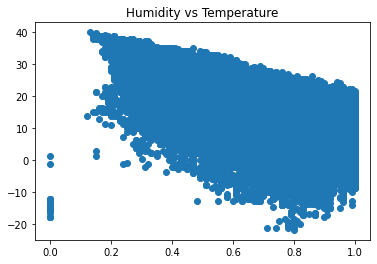

THERE IS RELATIONSHIP A BETWEEN HUMIDITY AND TEMPERATURE


In [71]:
plt.scatter(ds['Humidity'] , ds['Temperature (C)'] ,)
plt.title("Humidity vs Temperature")
plt.show()
print("THERE IS RELATIONSHIP A BETWEEN HUMIDITY AND TEMPERATURE")

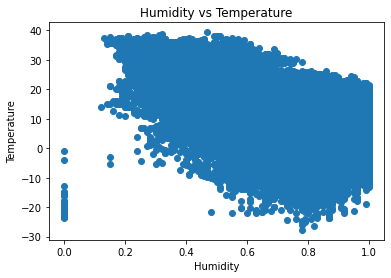

In [36]:
plt.scatter(ds['Humidity'] , ds['Apparent Temperature (C)'])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Humidity vs Temperature")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
df = ds[["Humidity" , "Apparent Temperature (C)"]]

In [29]:
df.head()

,Humidity,Apparent Temperature (C)
0,0.89,7.388889
1,0.86,7.227778
2,0.89,9.377778
3,0.83,5.944444
4,0.83,6.977778


In [35]:
df.drop(df[df['Humidity'] < 0.1].index , inplace=True)

<ipython-input-35-da36649eaf5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Humidity'] < 0.1].index , inplace=True)


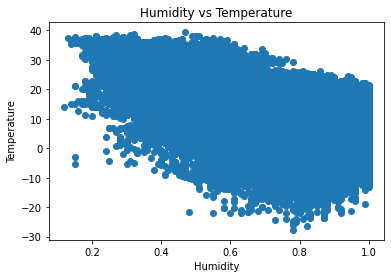

In [37]:
plt.scatter(df['Humidity'] , df['Apparent Temperature (C)'])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Humidity vs Temperature")
plt.show()

In [39]:
df.shape

(96431, 2)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df['Humidity'].values.reshape(-1,1)
Y = df['Apparent Temperature (C)'].values.reshape(-1,1)

In [42]:
x_train, x_test , y_train , y_test = train_test_split(X,Y, test_size=0.2)

In [43]:
x_train

array([[0.84],
       [0.76],
       [0.92],
       ...,
       [0.93],
       [0.65],
       [0.96]])

In [44]:
y_train

array([[20.48333333],
       [ 3.31111111],
       [-4.26111111],
       ...,
       [ 2.66666667],
       [11.85555556],
       [15.02777778]])

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [48]:
model.fit(x_train , y_train)

LinearRegression()

In [50]:
y_pred = model.predict(x_test)

In [51]:
y_pred

array([[11.34880077],
       [ 8.0340393 ],
       [11.68027691],
       ...,
       [10.35437233],
       [ 5.71370627],
       [10.68584847]])

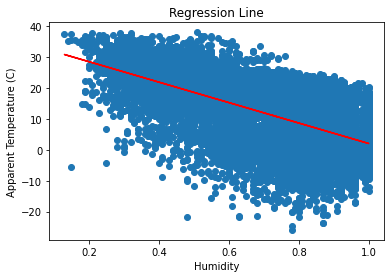

In [69]:
plt.scatter(x_test , y_test)
plt.plot(x_test , y_pred, color='red')
plt.title("Regression Line")
plt.xlabel("Humidity")
plt.ylabel("Apparent Temperature (C)")
plt.show()

In [78]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [79]:
print("R2 Score = " , r2_score(y_test, y_pred))
print("MSE = " , mean_squared_error(y_test,y_pred))
print("MAE = " , mean_absolute_error(y_test , y_pred))

R2 Score =  0.3669582378889159
MSE =  72.97659002398636
MAE =  7.0026802611431185


In [63]:
model.coef_

array([[-33.14761467]])

In [64]:
model.intercept_

array([35.21508333])

In [ ]:
print("single Prediction = ",)